In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [11]:
# A world object
class RandomWorld():
    '''
    A probablistic world that alternates between blocks of constant probability
    '''
    def __init__(self, rates, ntrials):
        '''
        rates: a list, rates of the world
        ntrials: a list, number of trials in each block
        '''
        self.rates = rates
        self.ntrials = ntrials
        self.curr_block = 0
        self.history = []
        self.rate_history = []
        self.curr_rate = self.rates[0]
        self.curr_side = np.random.rand() < self.curr_rate
        #print('curr side=  ', int(self.curr_side))
        
    def update(self, agent_choice):
        '''
        Update the world based on agent choice
        '''
        self.history.append(self.curr_side)
        self.rate_history.append(self.curr_rate)
        
        if agent_choice == self.curr_side:
            reward = 1
            #print('len history = ', len(self.history), 'next switch at', sum(self.ntrials[:self.curr_block + 1]))
            # See if the world should switch blocks
            if len(self.history) > sum(self.ntrials[:self.curr_block + 1]):
                print('world switching!')
                self.curr_block += 1
                self.curr_rate = self.rates[self.curr_block]
                        
            # Sample the next side
            self.curr_side = np.random.rand() < self.curr_rate
        
        else:
            # Incorrect, keep the same side
            reward = 0
                    
        return reward
            
    

# A Matching agent object
class MatchingAgent():
    '''
    Simulate an agent that matches perfectly (perfect integration of past rewards)
    '''
    def __init__(self):
        self.Rewards1side = 1 # Start with 1 so that the agent does not get 'stuck'
        self.Rewards0side = 1
        self.choice_history = []
        self.Rewards1side_history = []
        self.Rewards0side_history = []
        
    def outcome_received(self, outcome):
        if outcome == 1:
            if self.choice_history[-1] == 1:
                self.Rewards1side += 1
            else:
                self.Rewards0side += 1
                
        self.Rewards1side_history.append(self.Rewards1side)
        self.Rewards0side_history.append(self.Rewards0side)
              
    
    def make_choice(self):
        '''
        Make a choice, probabilistically sample from past reward ratios
        '''
        
        p = self.Rewards1side / (self.Rewards1side + self.Rewards0side)
        choice = np.random.rand() < p
        self.choice_history.append(choice)
        return choice
        
    
# A Matching agent object
class ConstantProbAgent():
    '''
    Simulate an agent that decides with a fixed probability
    '''
    def __init__(self, prob):
        self.choice_history = []
        self.prob = prob
#         self.Rewards1side_history = []
#         self.Rewards0side_history = []
        
    def outcome_received(self, outcome):
        pass
#         if outcome == 1:
#             if self.choice_history[-1] == 1:
#                 self.Rewards1side += 1
#             else:
#                 self.Rewards0side += 1
                
#         self.Rewards1side_history.append(self.Rewards1side)
#         self.Rewards0side_history.append(self.Rewards0side)
              
    
    def make_choice(self):
        '''
        Make a choice, probabilistically sample from past reward ratios
        '''
        choice = np.random.rand() < self.prob
        self.choice_history.append(choice)
        return choice    
    
    
class Experiment():
    '''
    An experiment consists of an agent in a world
    '''
    def __init__(self, agent, world):
        self.agent = agent
        self.world = world
        
        
    def run(self):
        '''
        Run the proposed experiment
        '''
        choices = []
        rewards = []
        for i in range(self.world.ntrials):
            choice = self.agent.make_choice()
            #print('choice = ', int(choice))
            choices.append(choice)
            reward = self.world.update(choice)
            #print('reward = ', int(reward))
            self.agent.outcome_received(reward)
            rewards.append(reward)
            
        return choices, rewards
    
    

In [12]:
def simulate_p_strategy(ntrials, pworld, pagent):
    world = RandomWorld([pworld], [10000])
    # Say we pick the choice randomly with prob 0.2
    choices = []
    rewards = []
    for i in range(ntrials):
        choice = np.random.rand() < pagent
        #print('choice = ', int(choice))
        choices.append(choice)
        reward = world.update(choice)
        rewards.append(reward)
        
    efficiency = np.sum(rewards) / ntrials
    return efficiency
    
        
        

In [13]:
# Let's plot the dependence on the p-strategy
N = 20
plst = np.linspace(0, 1, N)
results = np.zeros((N, N))
for idworld, pworld in enumerate(plst):
    for idagent, pagent in enumerate(plst):
        efficiency = simulate_p_strategy(1000, pworld=pworld, pagent=pagent)
        results[idworld][idagent] = efficiency
    

<IPython.core.display.Javascript object>


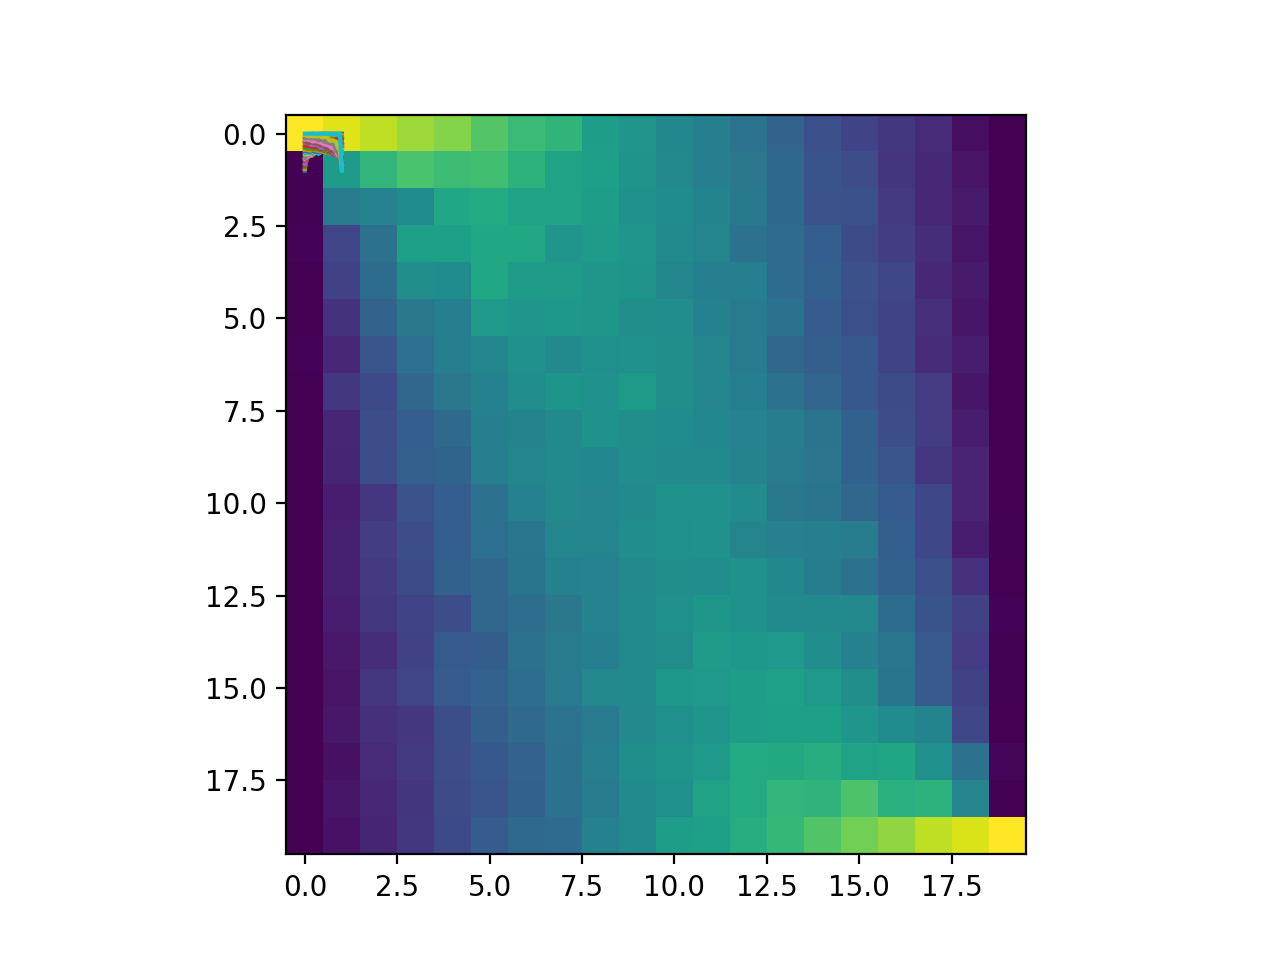

In [14]:
plt.figure()
plt.imshow(results)

In [31]:
parr = np.linspace(0, 1, 11)
efflist = []

for p in [0.2]:
    print(p)
    # Let's simulate the matching agent now
    world = RandomWorld([0.8, 0.2, 0.8, 0.2, 0.8, 0.2], [100, 100, 100, 100, 100, 100])
    agent = MatchingAgent()
    #agent = ConstantProbAgent(p)

    choices = []
    rewards = []
    for i in range(600):
        choice = agent.make_choice()
        #print('choice = ', int(choice))
        choices.append(choice)
        reward = world.update(choice)
        #print('reward = ', int(reward))
        agent.outcome_received(reward)
        rewards.append(reward)
        
    efflist.append(np.sum(rewards))
        

0.2
world switching!
world switching!
world switching!
world switching!
world switching!


<IPython.core.display.Javascript object>


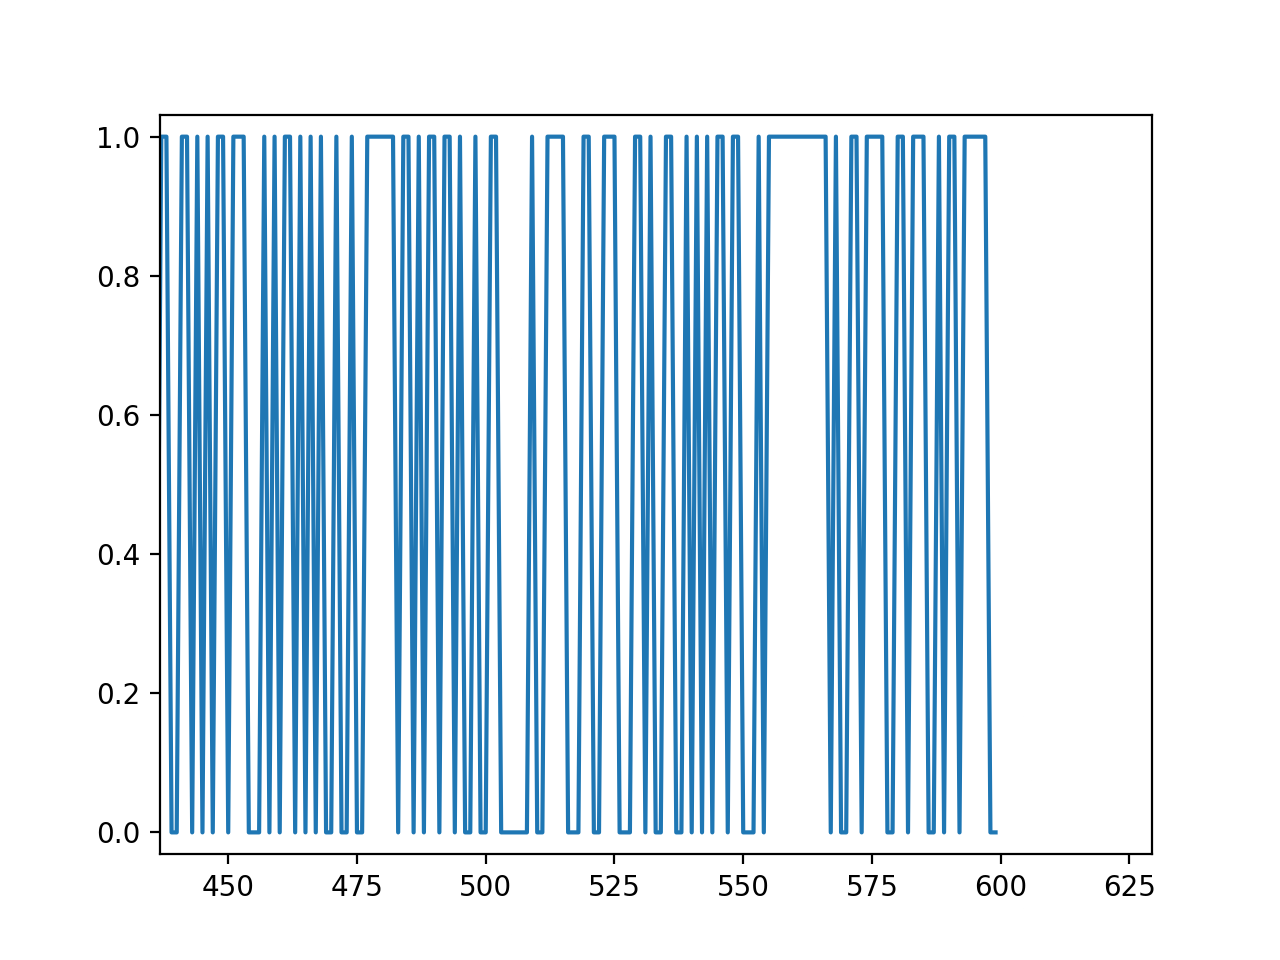

In [35]:
plt.figure()
plt.plot(choices)

<IPython.core.display.Javascript object>


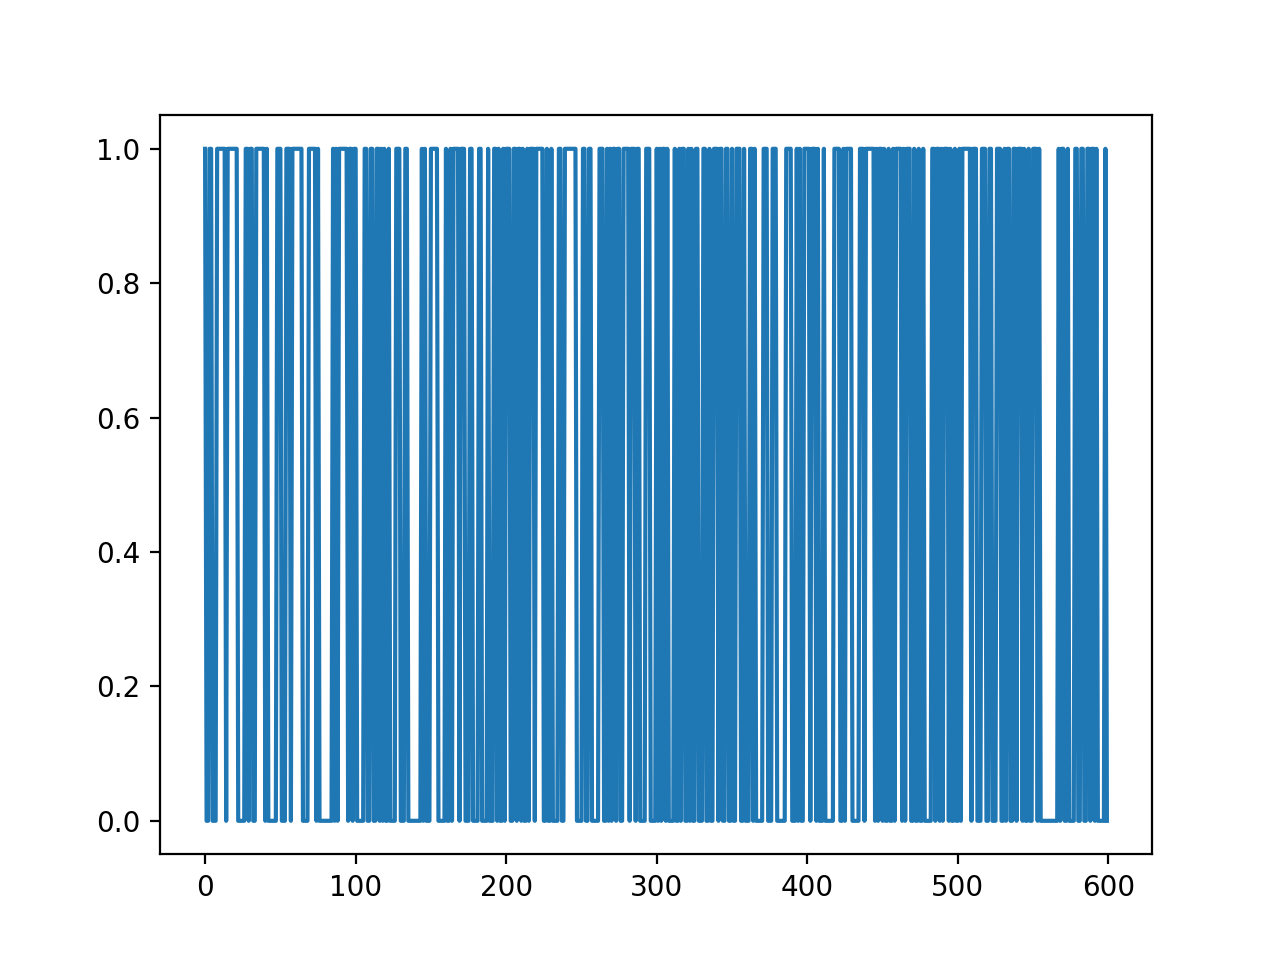

In [32]:
plt.figure()
plt.plot(rewards)

In [38]:
phist = np.array(agent.Rewards0side_history) / (np.array(agent.Rewards0side_history) + np.array(agent.Rewards1side_history))


<IPython.core.display.Javascript object>


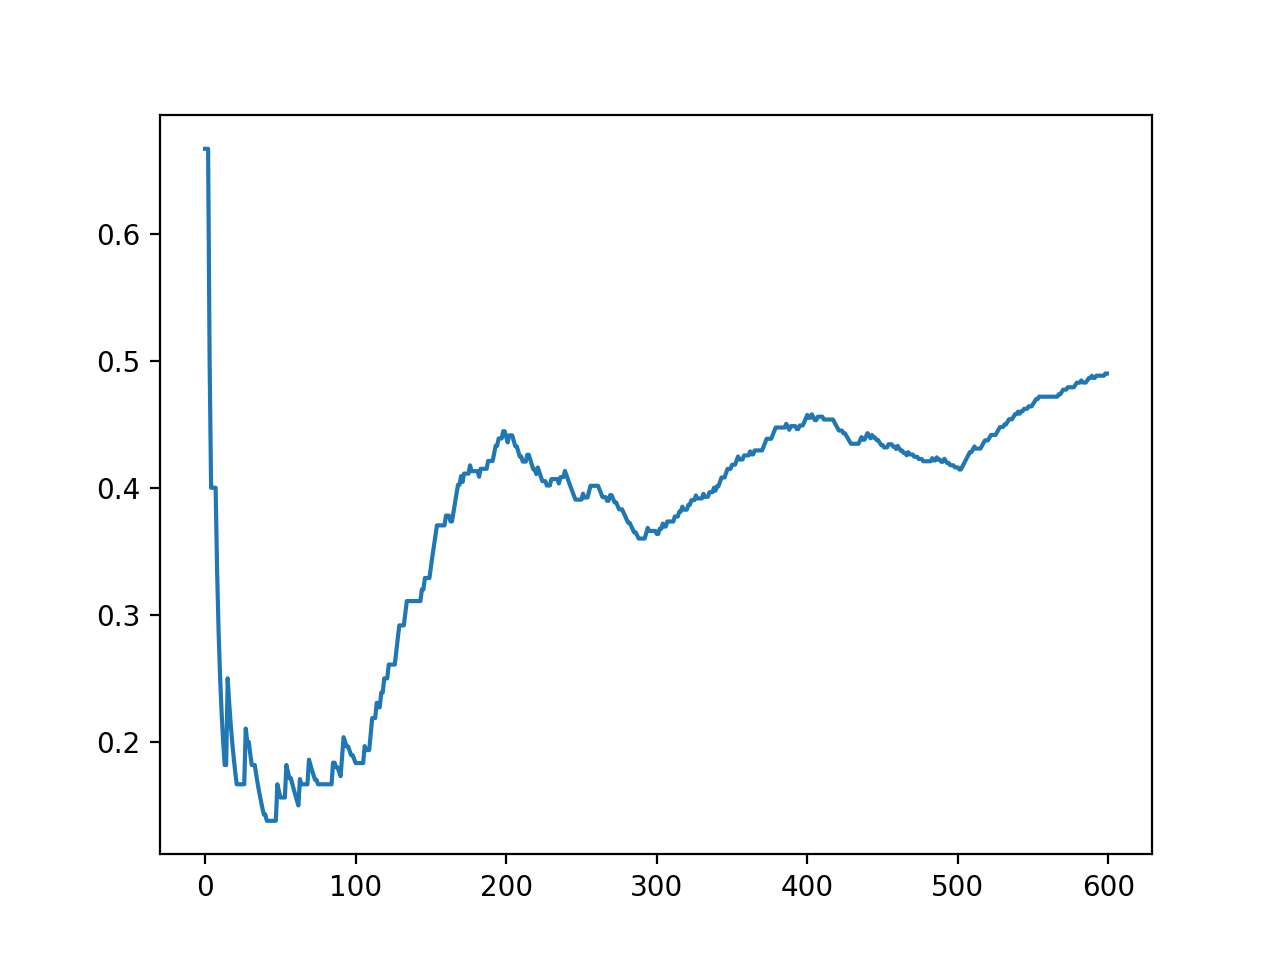

In [39]:
plt.figure()
plt.plot(phist)